In [94]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

df = pd.read_csv("collegebyregion.csv",dtype=str)
#df.columns
df.head()
#df["Starting Median Salary"]
#df.dtypes

#plt.plot(df["School Name"],df["Starting Median Salary"])


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",N/A,"$104,000.00","$161,000.00",N/A
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",N/A,"$96,000.00","$180,000.00",N/A
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",N/A,"$54,800.00","$157,000.00",N/A


In [95]:
#Exploring the dataset

df.columns

Index(['School Name', 'Region', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

Ok so this is a good first try, gotta parse it down a little 

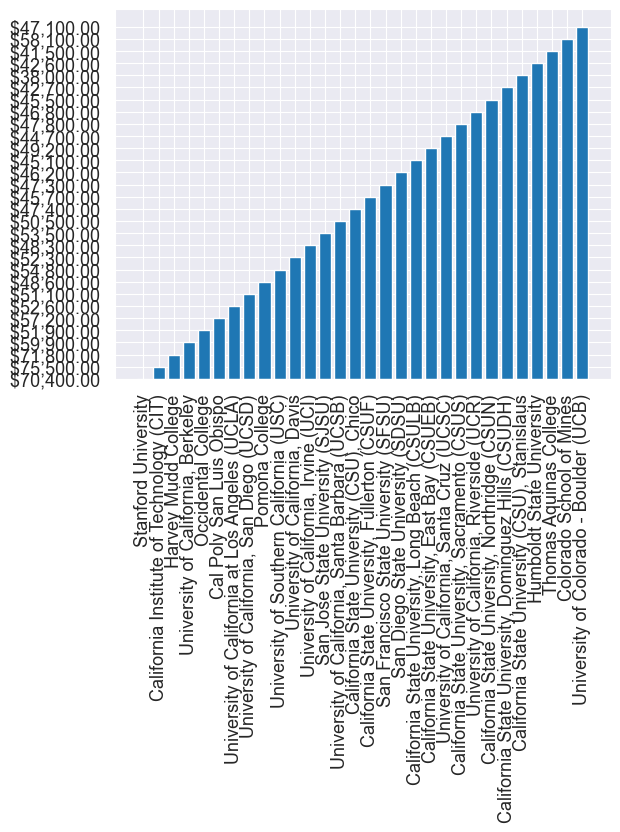

In [96]:
splitDF = df.head(30)
plt.bar(splitDF["School Name"],splitDF["Starting Median Salary"])
plt.xticks(rotation='vertical')
plt.show()

The chart is displaying like this because the salary values are sting types, I have to change it so the plot understands what these values mean. I will double check below 

Cleaning Data to readable types 

In [97]:
str_columns = ["School Name","Region"]

df.replace("N/A\xa0",0,inplace=True)

df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",0,"$104,000.00","$161,000.00",0
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",0,"$96,000.00","$180,000.00",0
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",0,"$54,800.00","$157,000.00",0


In [98]:

for column in df.columns: 
    if column not in str_columns: 
        print(column)
        df[column] = df[column].replace('[^\d.]', '', regex=True).astype(float)
    else:
        df[column] = df[column].str.strip()

df.head()


Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,0.0,104000.0,161000.0,0.0
2,Harvey Mudd College,California,71800.0,122000.0,0.0,96000.0,180000.0,0.0
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,0.0,54800.0,157000.0,0.0


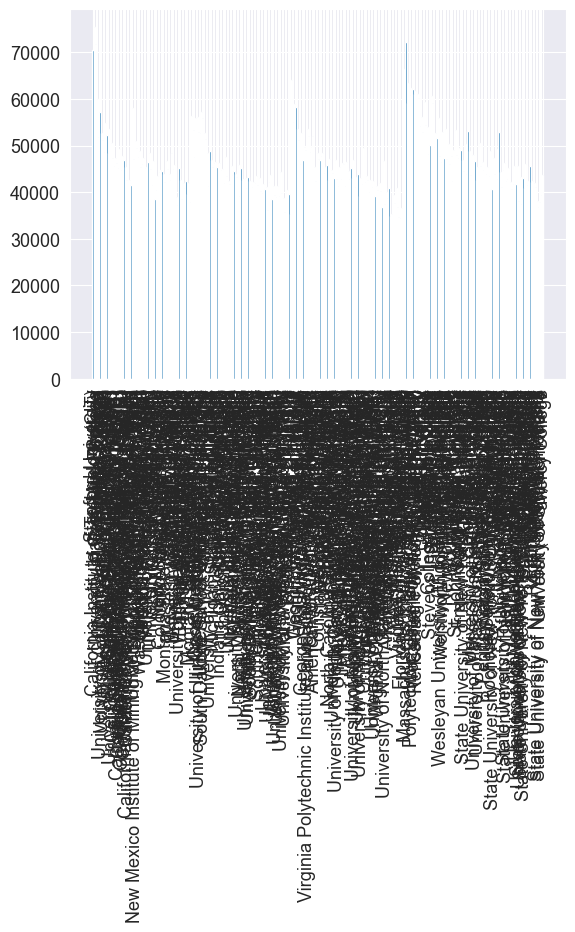

In [99]:


df["Starting Median Salary"].head()
plt.bar(df["School Name"],df["Starting Median Salary"])
plt.xticks(rotation='vertical')
plt.show()

OK so from this, There are a few to-dos now: 
1. Split dataframe into sections
    1. School type? (not the focus of this but still gonna split)
    2. Region? 
2. Graph each one of them with the data 
    1. Heat Map 
    2. Bar Plot 
    3. Scatter?? (not really needed but could be cool visuals for clustering)
3. Find summary statistics
4. Graph those summary statistics against eachother for further observation, maybe a line chart
    

Split Into Sections 

In [100]:
unique_entries_list = df['Region'].unique().tolist()
print(unique_entries_list)

df_Western = df[df['Region'] == 'Western']
df_California = df[df['Region'] == 'California']
df_Midwestern = df[df['Region'] == 'Midwestern']
df_Southern = df[df['Region'] == 'Southern']
df_Northeastern = df[df['Region'] == 'Northeastern']

print(df.shape)
print(df_Western.shape) 
print(df_California.shape)
print(df_Midwestern.shape)
print(df_Southern.shape)
print(df_Northeastern.shape)


['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']
(320, 8)
(42, 8)
(28, 8)
(71, 8)
(79, 8)
(100, 8)


In [101]:
#California has some more specifics 

ucDF = df[df['School Name'].str.contains('University of California', na=False)]
ucDF.head()


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
6,University of California at Los Angeles (UCLA),California,52600.0,101000.0,51300.0,72500.0,139000.0,193000.0
7,"University of California, San Diego (UCSD)",California,51100.0,101000.0,51700.0,75400.0,131000.0,177000.0
10,"University of California, Davis",California,52300.0,99600.0,52000.0,71600.0,135000.0,202000.0
11,"University of California, Irvine (UCI)",California,48300.0,96700.0,47800.0,66000.0,123000.0,172000.0


In [102]:

csuDF = df[df['School Name'].str.contains('California State University', na=False)]
csuDF.head()


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
14,"California State University (CSU), Chico",California,47400.0,88100.0,46800.0,62800.0,122000.0,154000.0
15,"California State University, Fullerton (CSUF)",California,45700.0,87000.0,45400.0,62500.0,119000.0,158000.0
18,"California State University, Long Beach (CSULB)",California,45100.0,84700.0,47400.0,62500.0,113000.0,154000.0
19,"California State University, East Bay (CSUEB)",California,49200.0,84300.0,46000.0,62400.0,115000.0,155000.0
21,"California State University, Sacramento (CSUS)",California,47800.0,82400.0,42900.0,59600.0,111000.0,154000.0


Graphing: region & school type <br>
['California', 'Western', 'Midwestern', 'Southern', 'Northeastern']

CSUs

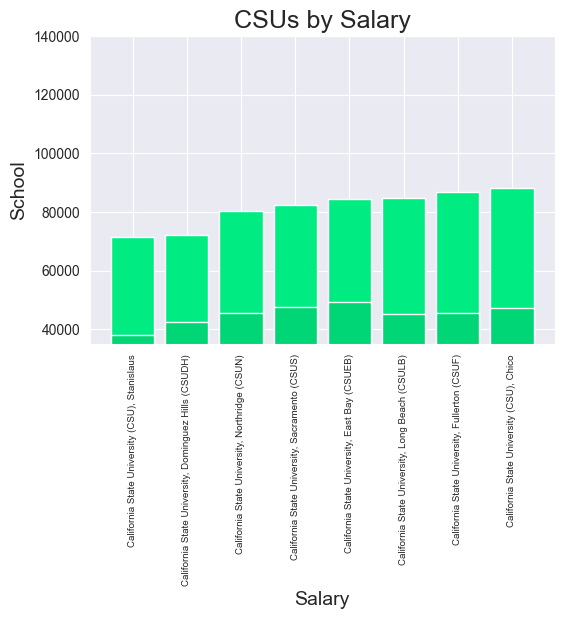

In [103]:
csuDF = csuDF.sort_values(by='Mid-Career Median Salary')
plt.figure(figsize=(6,4)) 
plt.bar(csuDF["School Name"],csuDF["Mid-Career Median Salary"], color = "#00EC82")
plt.bar(csuDF["School Name"],csuDF["Starting Median Salary"], color = "#00D676")
plt.yticks(fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 7)
plt.ylim([35000,140000])
plt.title("CSUs by Salary")
plt.xlabel("Salary")
plt.ylabel("School")
plt.show()


UCs

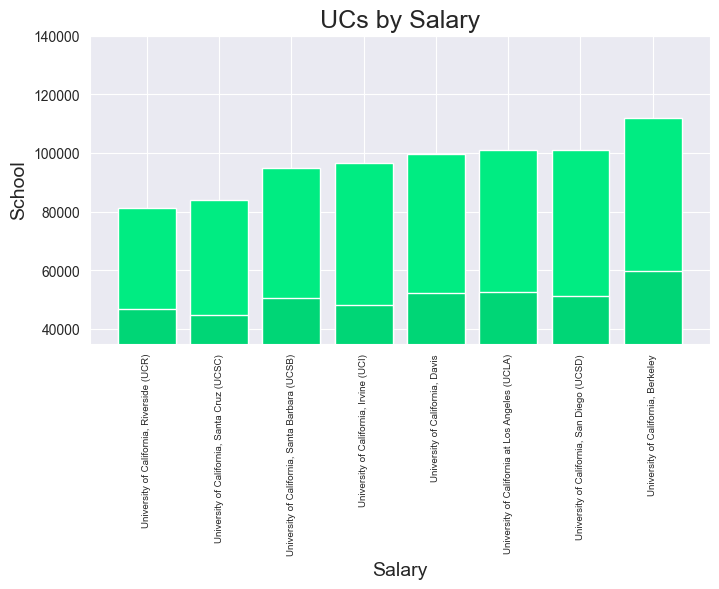

In [104]:
ucDF = ucDF.sort_values(by='Mid-Career Median Salary')
plt.figure(figsize=(8,4)) 
plt.bar(ucDF["School Name"],ucDF["Mid-Career Median Salary"], color = "#00EC82")
plt.bar(ucDF["School Name"],ucDF["Starting Median Salary"], color = "#00D676")
plt.yticks(fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 7)
plt.ylim([35000,140000])
plt.title("UCs by Salary")
plt.xlabel("Salary")
plt.ylabel("School")
plt.show()


Western

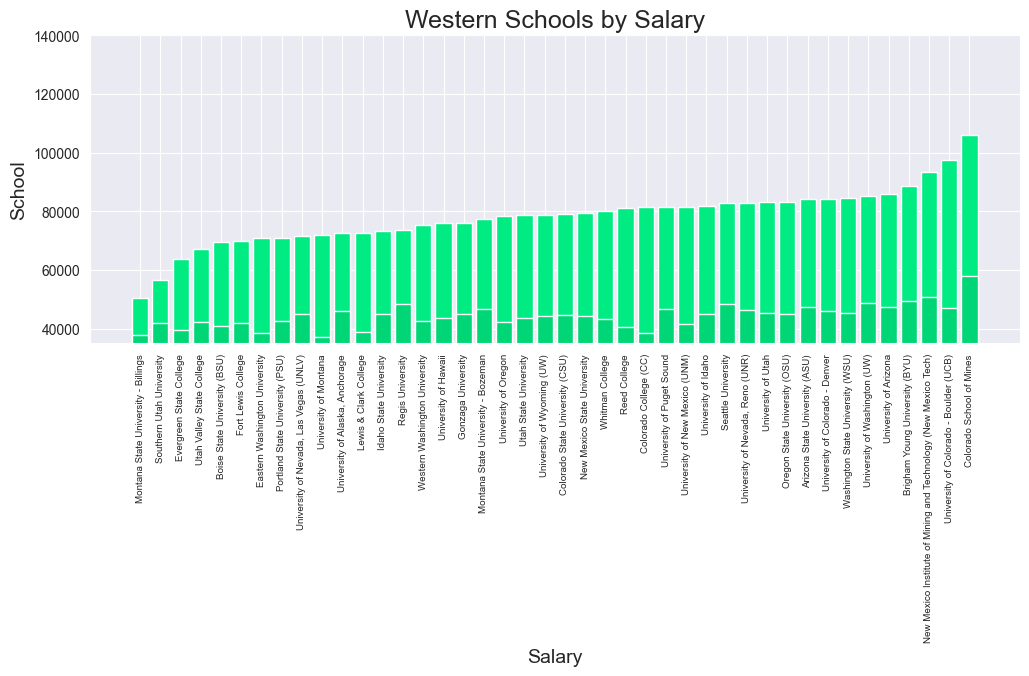

In [105]:
df_Western = df_Western.sort_values(by='Mid-Career Median Salary')
plt.figure(figsize=(12,4)) 
plt.bar(df_Western["School Name"],df_Western["Mid-Career Median Salary"], color = "#00EC82")
plt.bar(df_Western["School Name"],df_Western["Starting Median Salary"], color = "#00D676")
plt.yticks(fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 7)
plt.ylim([35000,140000])
plt.title("Western Schools by Salary")
plt.xlabel("Salary")
plt.ylabel("School")
plt.show()


Midwestern

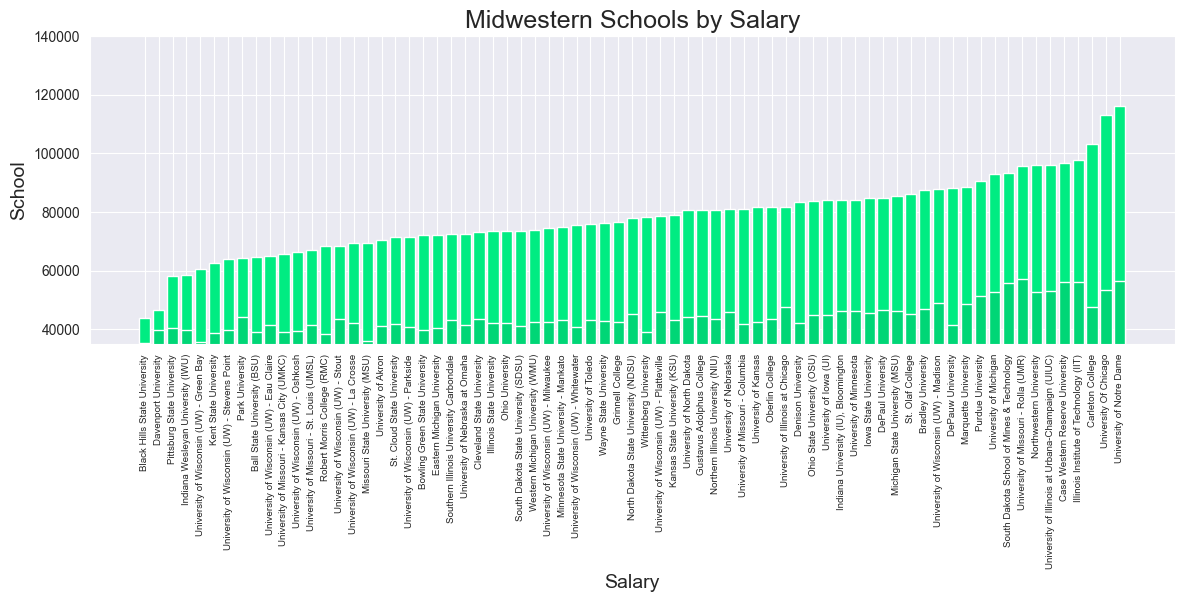

In [106]:
df_Midwestern = df_Midwestern.sort_values(by='Mid-Career Median Salary')
plt.figure(figsize=(14,4)) 
plt.bar(df_Midwestern["School Name"],df_Midwestern["Mid-Career Median Salary"], color = "#00EC82")
plt.bar(df_Midwestern["School Name"],df_Midwestern["Starting Median Salary"], color = "#00D676")
plt.yticks(fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 7)
plt.ylim([35000,140000])
plt.title("Midwestern Schools by Salary")
plt.xlabel("Salary")
plt.ylabel("School")
plt.show()


Southern

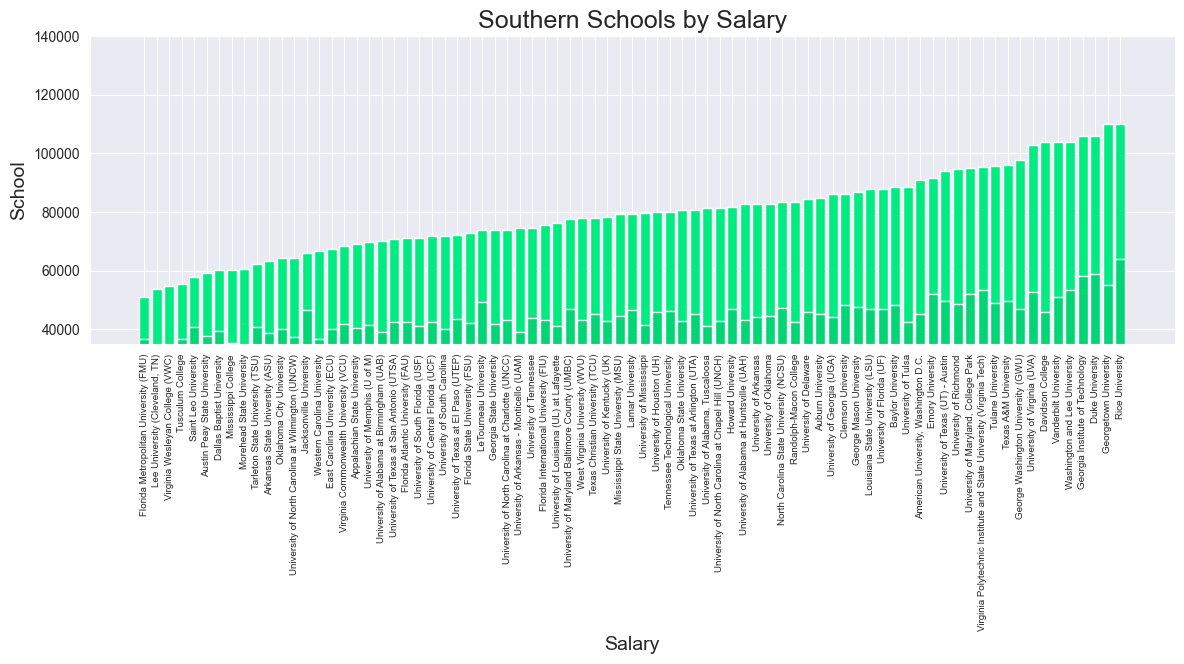

In [107]:
df_Southern = df_Southern.sort_values(by='Mid-Career Median Salary')
plt.figure(figsize=(14,4)) 
plt.bar(df_Southern["School Name"],df_Southern["Mid-Career Median Salary"], color = "#00EC82")
plt.bar(df_Southern["School Name"],df_Southern["Starting Median Salary"], color = "#00D676")
plt.yticks(fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 7)
plt.ylim([35000,140000])
plt.title("Southern Schools by Salary")
plt.xlabel("Salary")
plt.ylabel("School")
plt.show()

Northeastern


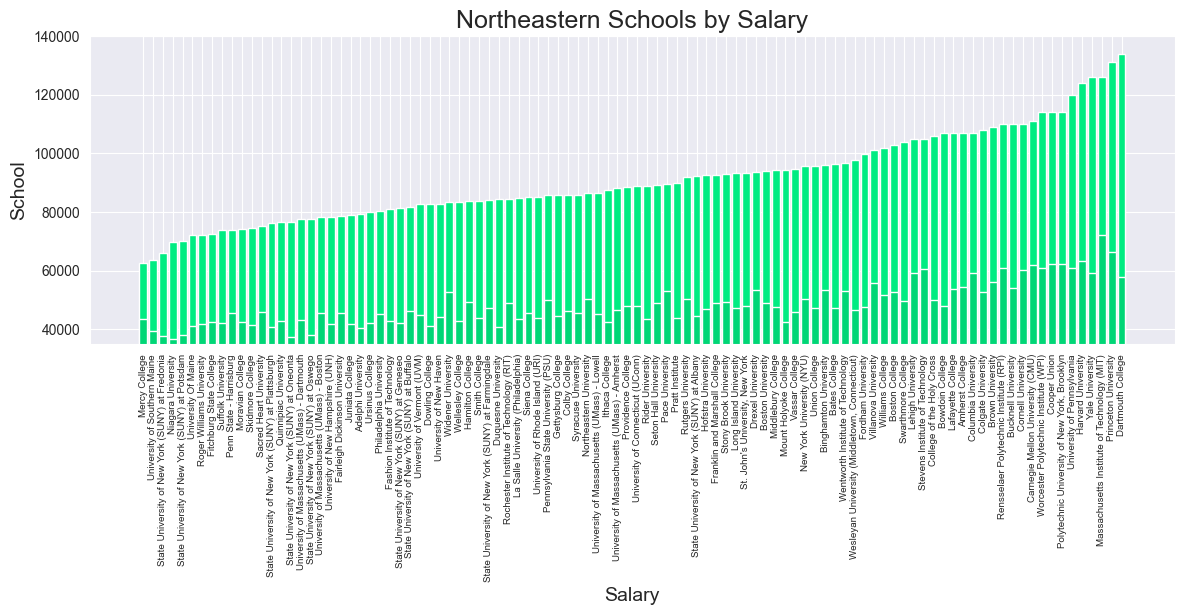

In [108]:
df_Northeastern = df_Northeastern.sort_values(by='Mid-Career Median Salary')
plt.figure(figsize=(14,4)) 
plt.bar(df_Northeastern["School Name"],df_Northeastern["Mid-Career Median Salary"], color = "#00EC82")
plt.bar(df_Northeastern["School Name"],df_Northeastern["Starting Median Salary"], color = "#00D676")
plt.yticks(fontsize = 10)
plt.xticks(rotation='vertical',fontsize = 7)
plt.ylim([35000,140000])
plt.title("Northeastern Schools by Salary")
plt.xlabel("Salary")
plt.ylabel("School")
plt.show()

I am realziing here that the graphs here are ugly, so I am going to process and analyse the data here, export the final findings to a csv and plot them using nicer software. I may still use this software to get a heatmap.

Summary Statistics

In [109]:
#Create a summary statistics DF 
summaryColumns = ['Dataset Name','Section','Statistic','Starting Median Salary','Mid-Career Median Salary']
summary_df = pd.DataFrame(columns=summaryColumns)
summary_df

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary


In [110]:
#statList = ['max','min','mean']
#columnList = ['Statistic','Starting Median Salary','Mid-Career Median Salary']
#ucDF_Summary_Stats = ucDF.describe()
#ucDF_Summary_Stats = ucDF_Summary_Stats.reset_index()
#ucDF_Summary_Stats = ucDF_Summary_Stats.rename(columns={'index': 'Statistic'})
#ucDF_Summary_Stats = ucDF_Summary_Stats[ucDF_Summary_Stats['Statistic'].isin(statList)]
#ucDF_Summary_Stats = ucDF_Summary_Stats[columnList]
#summary_df = pd.concat([summary_df,ucDF_Summary_Stats])
#summary_df['Dataset Name'] = summary_df['Dataset Name'].fillna("College By Region")
#summary_df['Section'] = summary_df['Section'].fillna("UC")
#summary_df.head()


OK this process is working so I am gonna turn it into a function to repeat for all the other regions

In [111]:
#Needs fixing, max min and mean need to be in one row
statList = ['max','min','mean']
columnList = ['Statistic','Starting Median Salary','Mid-Career Median Salary']

def fill_summary_statistic_df(summary_df,dfName,section):
    dfName = dfName.describe()
    dfName = dfName.reset_index()
    dfName = dfName.rename(columns={'index': 'Statistic'})
    dfName = dfName[dfName['Statistic'].isin(statList)]
    dfName = dfName[columnList]
    summary_df = pd.concat([summary_df,dfName])
    summary_df['Dataset Name'] = summary_df['Dataset Name'].fillna("College By Region")
    summary_df['Section'] = summary_df['Section'].fillna(section)
    return summary_df
    


In [112]:
# Add UCs
summary_df = fill_summary_statistic_df(summary_df,ucDF,"UC")
summary_df.tail(3)

C:\Users\krazy\AppData\Local\Temp\ipykernel_19648\932117269.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat([summary_df,dfName])


,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
1,College By Region,UC,mean,50775.0,96337.5
3,College By Region,UC,min,44700.0,81300.0
7,College By Region,UC,max,59900.0,112000.0


In [113]:
#Add CSUs
summary_df = fill_summary_statistic_df(summary_df,csuDF,"csu")
summary_df.tail(4)

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
7,College By Region,UC,max,59900.0,112000.0
1,College By Region,csu,mean,45175.0,81300.0
3,College By Region,csu,min,38000.0,71400.0
7,College By Region,csu,max,49200.0,88100.0


In [114]:
#Add CSUs
summary_df = fill_summary_statistic_df(summary_df,csuDF,"csu")
summary_df.tail(4)

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
7,College By Region,csu,max,49200.0,88100.0
1,College By Region,csu,mean,45175.0,81300.0
3,College By Region,csu,min,38000.0,71400.0
7,College By Region,csu,max,49200.0,88100.0


In [115]:
#Add Western
summary_df = fill_summary_statistic_df(summary_df,df_Western,"Western")
summary_df.tail(4)

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
7,College By Region,csu,max,49200.000000,88100.0
1,College By Region,Western,mean,44414.285714,78200.0
3,College By Region,Western,min,37300.000000,50600.0
7,College By Region,Western,max,58100.000000,106000.0


In [116]:
#Add Midwestern 
summary_df = fill_summary_statistic_df(summary_df,df_Midwestern,"Midwestern")
summary_df.tail(4)

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
7,College By Region,Western,max,58100.000000,106000.00000
1,College By Region,Midwestern,mean,44225.352113,78180.28169
3,College By Region,Midwestern,min,35300.000000,43900.00000
7,College By Region,Midwestern,max,57100.000000,116000.00000


In [117]:
#Add Southern 
summary_df = fill_summary_statistic_df(summary_df,df_Southern,"Southern")
summary_df.tail(4)

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
7,College By Region,Midwestern,max,57100.000000,116000.000000
1,College By Region,Southern,mean,44521.518987,79505.063291
3,College By Region,Southern,min,34500.000000,51000.000000
7,College By Region,Southern,max,64000.000000,110000.000000


In [118]:
#Add Northeastern
summary_df = fill_summary_statistic_df(summary_df,df_Northeastern,"Northeastern")
summary_df.tail(4)

,Dataset Name,Section,Statistic,Starting Median Salary,Mid-Career Median Salary
7,College By Region,Southern,max,64000.0,110000.0
1,College By Region,Northeastern,mean,48496.0,91352.0
3,College By Region,Northeastern,min,36900.0,62600.0
7,College By Region,Northeastern,max,72200.0,134000.0


In [119]:
#Exporting Stats to csv
summary_df.to_csv("Summary_Stats.csv")

Combined Statistics 

In [120]:
#exporting parsed data to a csv

Combined Graphs: A heat map 
1. Get all data
2. Get geolocations for each element of data 
3. graph on a map of the USA